In [1]:
# Import stuff
from collections import namedtuple, deque, defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define some simple classes

Point = namedtuple('Point', ['x', 'y'])

class Segment(namedtuple('Segment', ['a', 'b'])):
    __slots__ = ()

    # Create a list of 4 Koch child segments 
    def spawn(self):
        
        near_a = Point((2 * self.a.x + self.b.x) / 3, (2 * self.a.y + self.b.y) / 3)
        near_b = Point((self.a.x + 2 * self.b.x) / 3, (self.a.y + 2 * self.b.y) / 3)
        
        ab3 = Point((self.b.x-self.a.x)/3, (self.b.y-self.a.y)/3)
        offset_mid = Point(near_a.x + (ab3.x - np.sqrt(3) * ab3.y)/2, near_a.y + (np.sqrt(3) * ab3.x + ab3.y)/2)
        
        return [
            Segment(self.a, near_a),
            Segment(near_a, offset_mid),
            Segment(offset_mid, near_b),
            Segment(near_b, self.b),
        ]

In [3]:
# Plot 'em all pretty like
def draw_segments(segments, figsize=None):
    fig, ax = plt.subplots(figsize=figsize)
    for seg in segments:
        ax.plot([seg.a.x, seg.b.x], [seg.a.y, seg.b.y], 'k')
    ax.set_aspect('equal')
    ax.set_xlim(np.array(ax.get_xlim()) + np.array([-0.01, 0.01]))
    ax.set_ylim(np.array(ax.get_ylim()) + np.array([-0.01, 0.01]))
    ax.axis('off')
    plt.show()

In [4]:
# Take a list of parent segments and apply max_generation Koch iterations
def splinter(segments, max_generation):
    done = defaultdict(list)
    queue = deque()
    
    for seg in segments:
        queue.append([0, seg])
        done[0].append(seg)
    
    while queue:
        gen, seg = queue.popleft()
        for child in seg.spawn():
            done[gen + 1].append(child)
            if gen < max_generation - 1:
                queue.append((gen + 1, child))
    
    return done       

In [5]:
# Let's try it out!
parents = [Segment(Point(-1,0), Point(1,0))]
results = splinter(parents, 6)

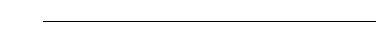

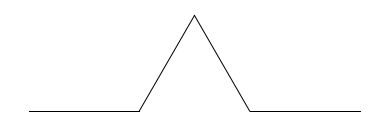

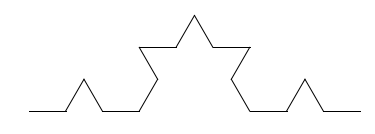

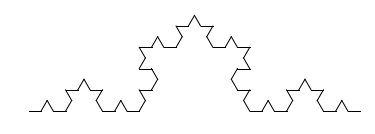

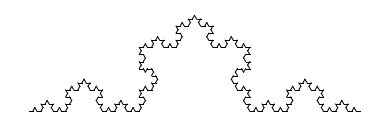

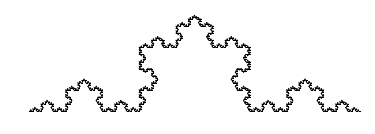

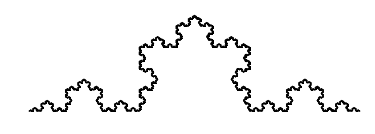

In [6]:
# Draw progress
draw_segments(results[0])
draw_segments(results[1])
draw_segments(results[2])
draw_segments(results[3])
draw_segments(results[4])
draw_segments(results[5])
draw_segments(results[6])

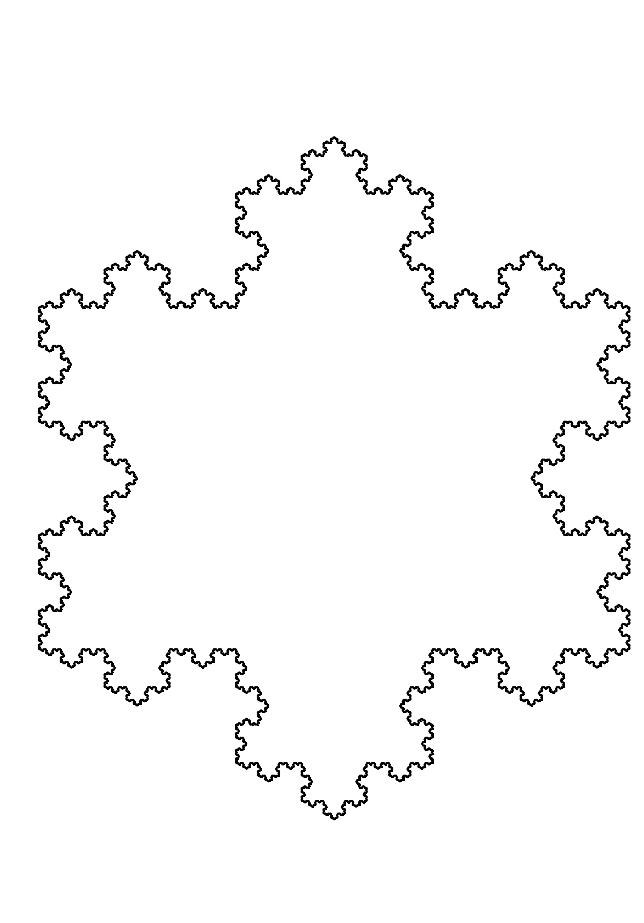

In [7]:
# The famous snowflake
triangle = [
    Segment(Point(-1,0), Point(1,0)),
    Segment(Point(1,0), Point(0, -np.sqrt(3))),
    Segment(Point(0, -np.sqrt(3)), Point(-1,0)),
]
snowflake = splinter(triangle, 7)
draw_segments(snowflake[7], figsize=(16,16))